In [8]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
transactions    = pd.read_csv('sales_train.csv.gz')
items           = pd.read_csv('items.csv',encoding ='ISO-8859-1')
item_categories = pd.read_csv('item_categories.csv',encoding ='ISO-8859-1')
shops           = pd.read_csv('shops.csv',encoding ='ISO-8859-1')
test            = pd.read_csv('test.csv.gz')

In [6]:
print(transactions.shape)
print(test.shape)

(2935849, 6)
(214200, 3)


In [7]:
transactions['date_format'] = pd.to_datetime(transactions.date,format='%d.%m.%Y')

In [9]:
transactions.item_cnt_day.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

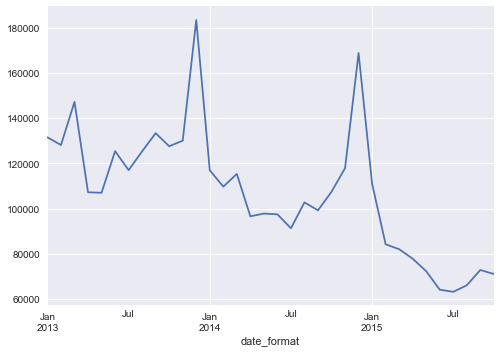

In [18]:
plt.style.use('seaborn')

transactions.copy().set_index('date_format').item_cnt_day.resample('M').sum().plot();
plt.show()

In [11]:
plt.style.use('seaborn')
transactions.copy().set_index('date_format').item_cnt_day.resample('M') \
                            .mean().plot();

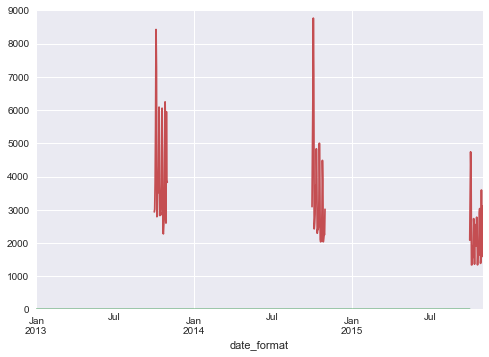

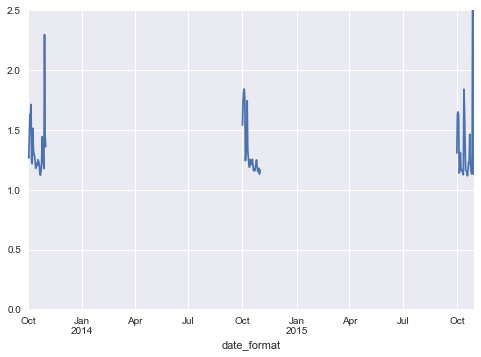

In [12]:
plt.style.use('seaborn')
transactions[list(map(lambda x: x.month in [10] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
transactions[list(map(lambda x: x.month in [10] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show() 

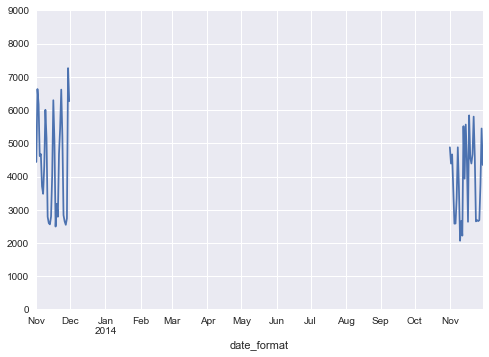

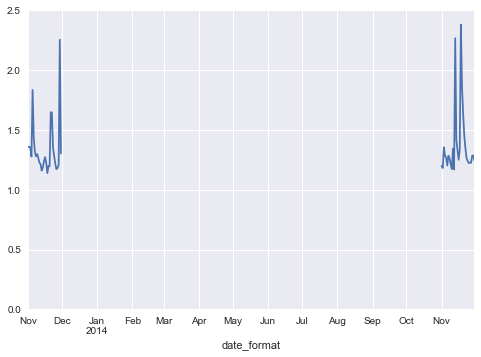

In [13]:
plt.style.use('seaborn')
transactions[list(map(lambda x: x.month in [11] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
transactions[list(map(lambda x: x.month in [11] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()

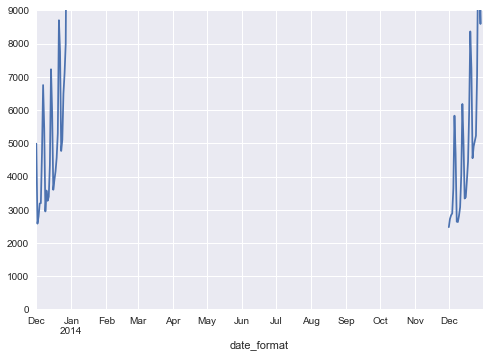

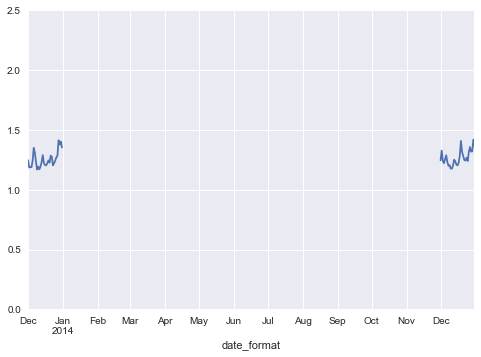

In [14]:
plt.style.use('seaborn')
transactions[list(map(lambda x: x.month in [12] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
transactions[list(map(lambda x: x.month in [12] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show() 

In [24]:
sales    = pd.read_csv('sales_train.csv.gz')

sales[sales.item_cnt_day<=1000]
# there is only 1 item
#sales = sales[sales.item_price<100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0
